<a href="https://colab.research.google.com/github/Maureenchepkirui/Hass_Real_Estate/blob/main/Copy_of_Maureen_Chepkirui_Hass_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFINING THE QUESTION**

## **a) Specifying the question**
You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# **b) The metric for success**
create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# **c) Understanding the context**
 Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# ** d) Experimantal Design**
1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Performing regression analysis.
7. Incorporate categorical independent variables into your models.
8. Check for multicollinearity
9. Provide a recommendation based on your analysis. 
10. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
11. Challenge your solution by providing insights on how you can make improvements in model improvement.
12. Provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

a)Multiple Linear Regression

b)Quantile Regression

c)Ridge Regression

d)Lasso Regression

e)Elastic Net Regression

## **e) Relevance of the data**
The data used for this project is necessary for the understanding of the real estate complexities and factors which later determine theoutcome of the project among others

# **Checking the Data**

In [174]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [175]:
#Reading the data
data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [176]:
#previewing the number of columns
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [177]:
#Checking the shape of our dataset and displaying the result
print('The dataset has', data.shape[0],'rows and',data.shape[1],'columns')

The dataset has 21613 rows and 20 columns


In [178]:
#previewing the top of our dataset
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [179]:
#previewing the tail of our dataset
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [180]:
#Checking the datatypes of our dataset
data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# **Data Cleaning**

In [181]:
data.info

<bound method DataFrame.info of                id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 co

In [182]:
#checking for null values
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The dataset has zero null values

In [183]:
#checking for duplicate values in the dataset
data.duplicated().sum()

3

The dataset has 3 duplicates.

In [184]:
#dropping all duplicates and displaying the result.
data.drop_duplicates(inplace=True)
print('The dataset now has', data.duplicated().sum(),'duplicates')
#data.duplicated().sum()

The dataset now has 0 duplicates


In [185]:
#Checking the shape of our dataset after duplicates have been dropped and displaying the result
print('The dataset has', data.shape[0],'rows and',data.shape[1],'columns')

The dataset has 21610 rows and 20 columns


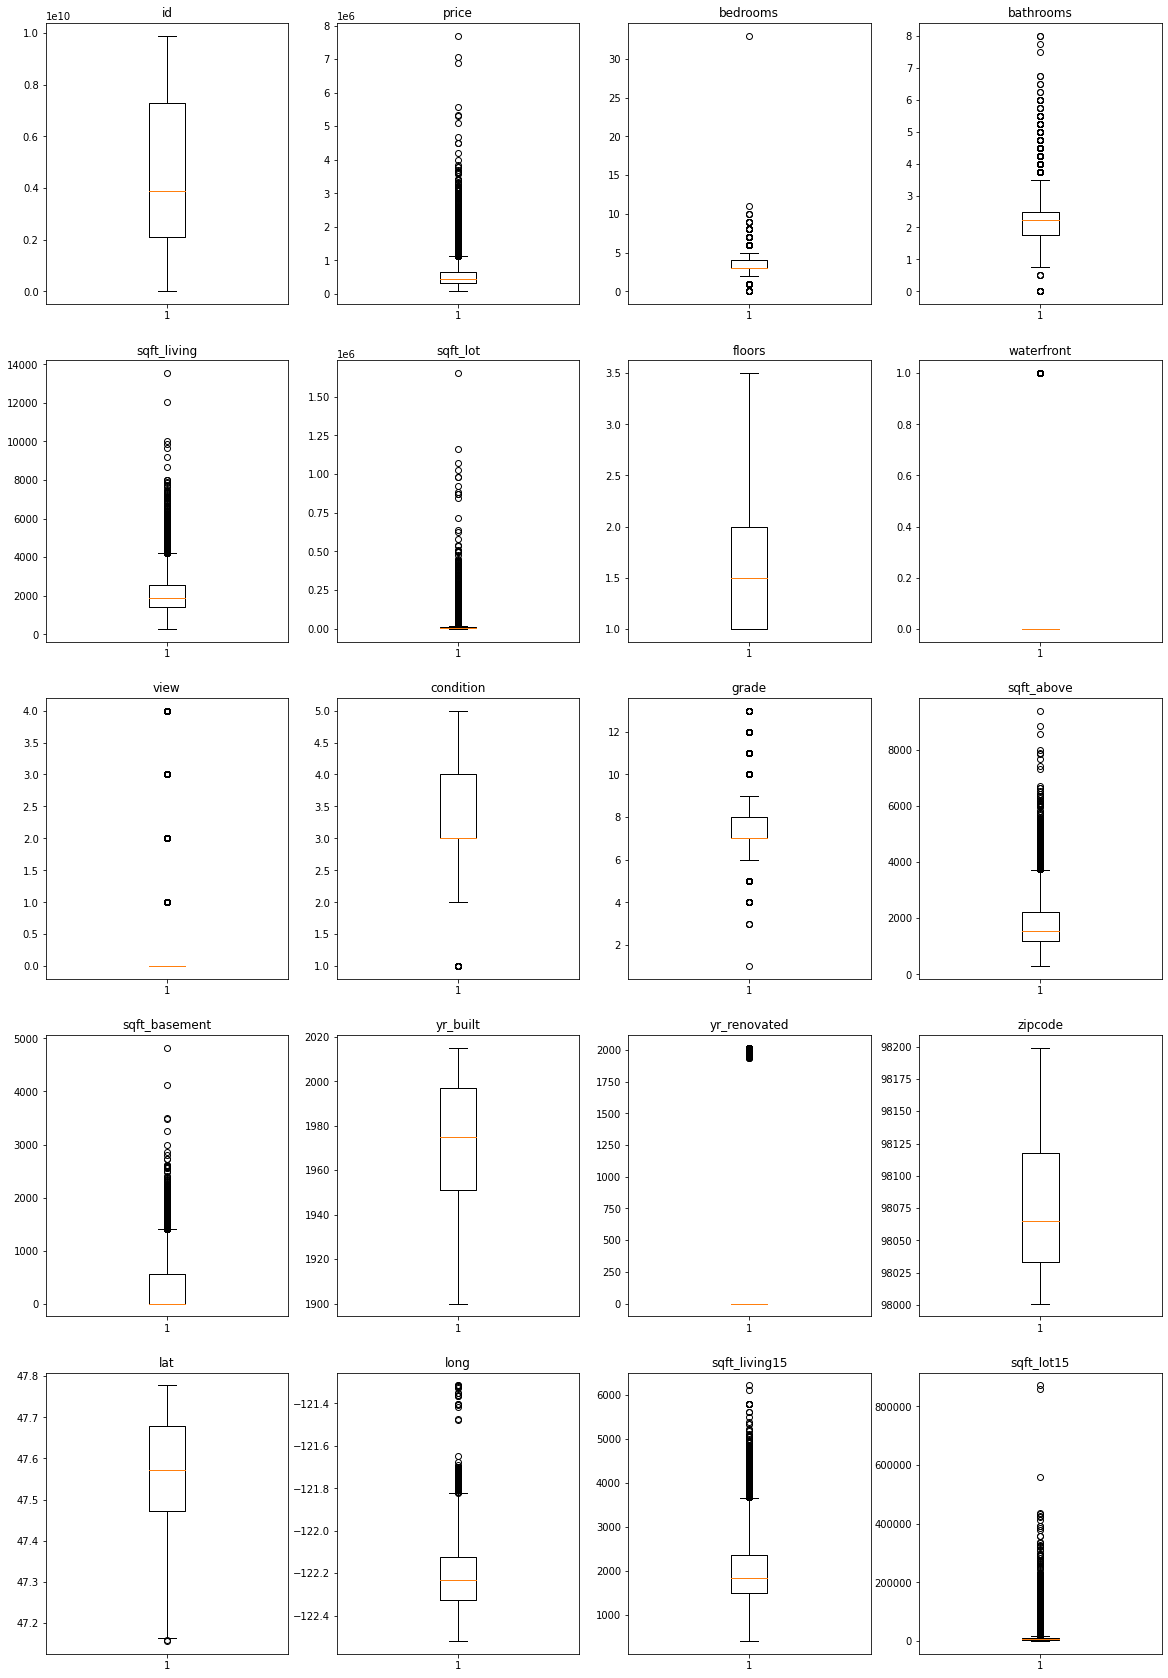

In [186]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

In [187]:
#Dealing with outliers
# dealing with outliers
# quantiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print('our new dataset has', df.shape[0],'rows and',df.shape[1],'columns')

# Printing the shape of our old dataset
print('our old dataset has', data.shape[0],'rows and',data.shape[1],'columns')

our new dataset has 14935 rows and 20 columns
our old dataset has 21610 rows and 20 columns


In [188]:
df1 = df.drop(['id','yr_built', 'grade', 'yr_renovated', 'waterfront', 'view', 'condition', 'sqft_living15', 'sqft_basement', 'sqft_lot15'], axis = 1)

I dropped the above columns since i did not find them necessary for the analysis.

In [189]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14935 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        14935 non-null  float64
 1   bedrooms     14935 non-null  int64  
 2   bathrooms    14935 non-null  float64
 3   sqft_living  14935 non-null  int64  
 4   sqft_lot     14935 non-null  int64  
 5   floors       14935 non-null  float64
 6   sqft_above   14935 non-null  int64  
 7   zipcode      14935 non-null  int64  
 8   lat          14935 non-null  float64
 9   long         14935 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.3 MB


In [190]:
# converting variables from float to int 
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [191]:
# converting year to datetime
df['yr_built'] = pd.to_datetime(df['yr_built'])
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

In [192]:
# replacing values in waterfront with a yes and no
df = df.replace({'waterfront': {0 :'no', 1 :'yes'}})

# **EXPLORATORY DATA ANALYSIS**

**Univariate Analysis**

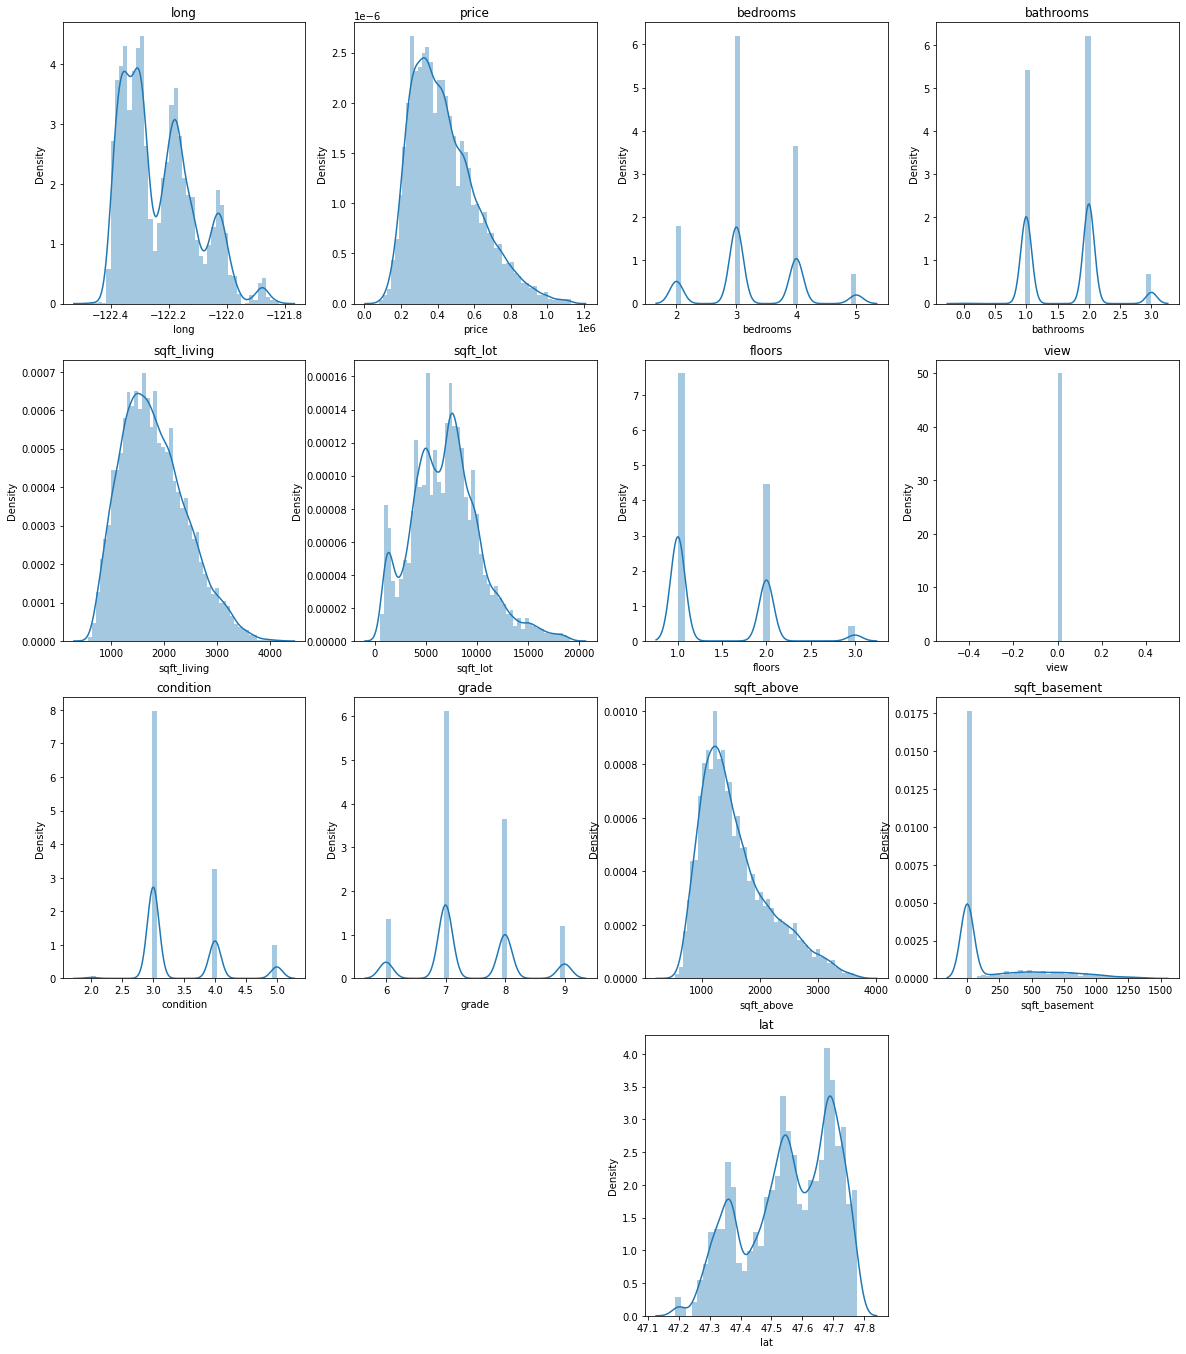

In [193]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'long': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12, 'lat': 15}
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

In [194]:
# Finding the standard deviation
columns_dict = {'long': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12, 'lat': 15}
for variable,i in columns_dict.items():
  print('\n')
  print(variable + ', Standard deviation: '+ str(data[variable].std()))
  print(variable + ', Variance: '+ str(data[variable].var()))
  print(variable + ', Skewness: '+ str(data[variable].skew()))
  print(variable + ', Kurtosis: '+ str(data[variable].kurt()))



long, Standard deviation: 0.14083282331969976
long, Variance: 0.019833884124197766
long, Skewness: 0.8853124188954229
long, Kurtosis: 1.0498286220084077


price, Standard deviation: 367387.58505388984
price, Variance: 134973637651.72916
price, Skewness: 4.021467451317612
price, Kurtosis: 34.517437729615054


bedrooms, Standard deviation: 0.9301096999846462
bedrooms, Variance: 0.8651040540055286
bedrooms, Skewness: 1.9742435470953739
bedrooms, Kurtosis: 49.06010825423431


bathrooms, Standard deviation: 0.770203702285374
bathrooms, Variance: 0.593213743014097
bathrooms, Skewness: 0.5111642830477003
bathrooms, Kurtosis: 1.2796371646131974


sqft_living, Standard deviation: 918.5002986169898
sqft_living, Variance: 843642.7985594993
sqft_living, Skewness: 1.4715321846904306
sqft_living, Kurtosis: 5.242222911342459


sqft_lot, Standard deviation: 41423.2267370033
sqft_lot, Variance: 1715883713.305185
sqft_lot, Skewness: 13.059170061304911
sqft_lot, Kurtosis: 285.0406214916321


floors, St

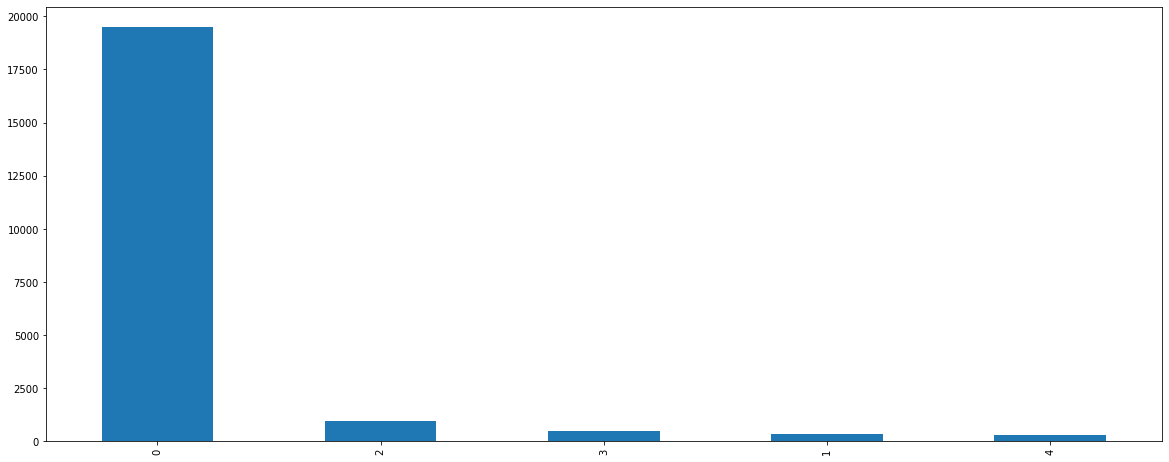

In [195]:
# Distribution of number of views

data['view'].value_counts().plot.bar(figsize=(20,8))

In [196]:
# describing the data
df.describe()

# displays the statistical features of the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.493500e+04,1.493500e+04,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,14935.0,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000
mean,4.729214e+09,4.386582e+05,3.262337,1.615400,1814.293940,6988.896150,1.425243,0.0,3.420623,7.380516,1585.198594,229.095347,98079.765383,47.558906,-122.230169,1796.942819,6868.331034
std,2.851519e+09,1.805742e+05,0.772942,0.592962,614.767257,3355.737263,0.559939,0.0,0.647318,0.805205,601.524228,353.371132,53.477499,0.142091,0.123688,507.449152,2987.774641
min,2.800031e+06,8.200000e+04,2.000000,0.000000,560.000000,520.000000,1.000000,0.0,2.000000,6.000000,480.000000,0.000000,98001.000000,47.189500,-122.472000,620.000000,651.000000
25%,2.321300e+09,3.000000e+05,3.000000,1.000000,1350.000000,4690.000000,1.000000,0.0,3.000000,7.000000,1140.000000,0.000000,98033.000000,47.457600,-122.333000,1430.000000,4800.000000
50%,4.037800e+09,4.050000e+05,3.000000,2.000000,1740.000000,7020.000000,1.000000,0.0,3.000000,7.000000,1430.000000,0.000000,98072.000000,47.569700,-122.264000,1710.000000,7172.000000
75%,7.453500e+09,5.475000e+05,4.000000,2.000000,2210.000000,8925.000000,2.000000,0.0,4.000000,8.000000,1910.000000,450.000000,98118.000000,47.683500,-122.153000,2090.500000,8649.500000
max,9.900000e+09,1.130000e+06,5.000000,3.000000,4200.000000,19141.000000,3.000000,0.0,5.000000,9.000000,3740.000000,1400.000000,98199.000000,47.777600,-121.821000,3640.000000,17550.000000


**Bivariate Analysis**

In [197]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode', 'lat', 'long'],
      dtype='object')

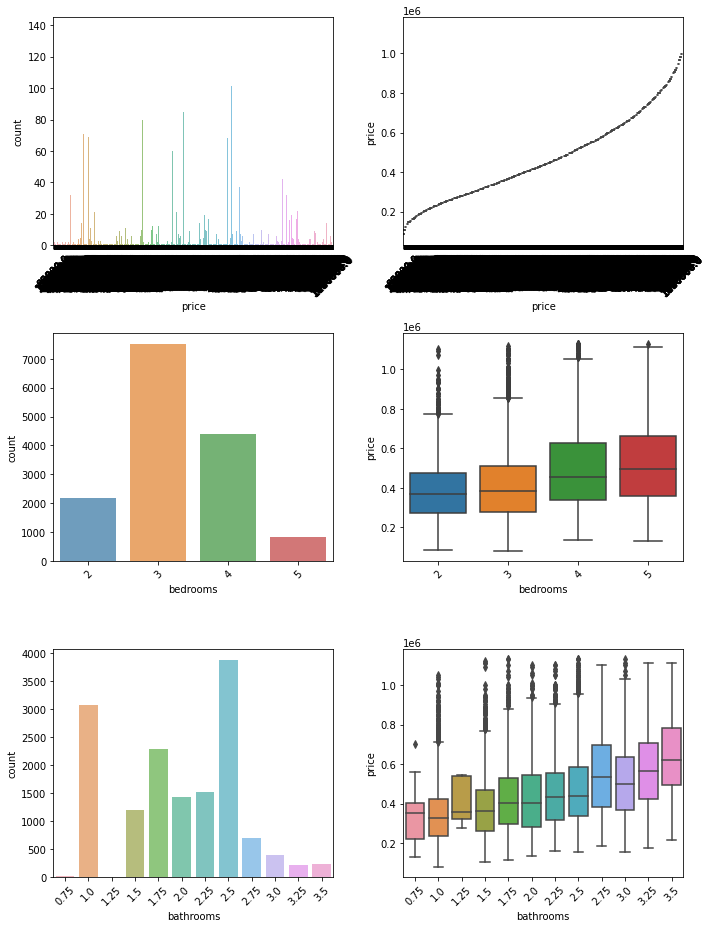

In [198]:
### Categoric Feature Analysis
# Boxplot gives a good idea about how the Price is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3 # (len(df1.columns)-2)
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))     # fig height = 70 -> in figsize(width,height)
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df1.columns[c], alpha=0.7, data=df1, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df1, x=df1.columns[c], y='price', ax=ax)
        c = c + 1
fig.tight_layout()

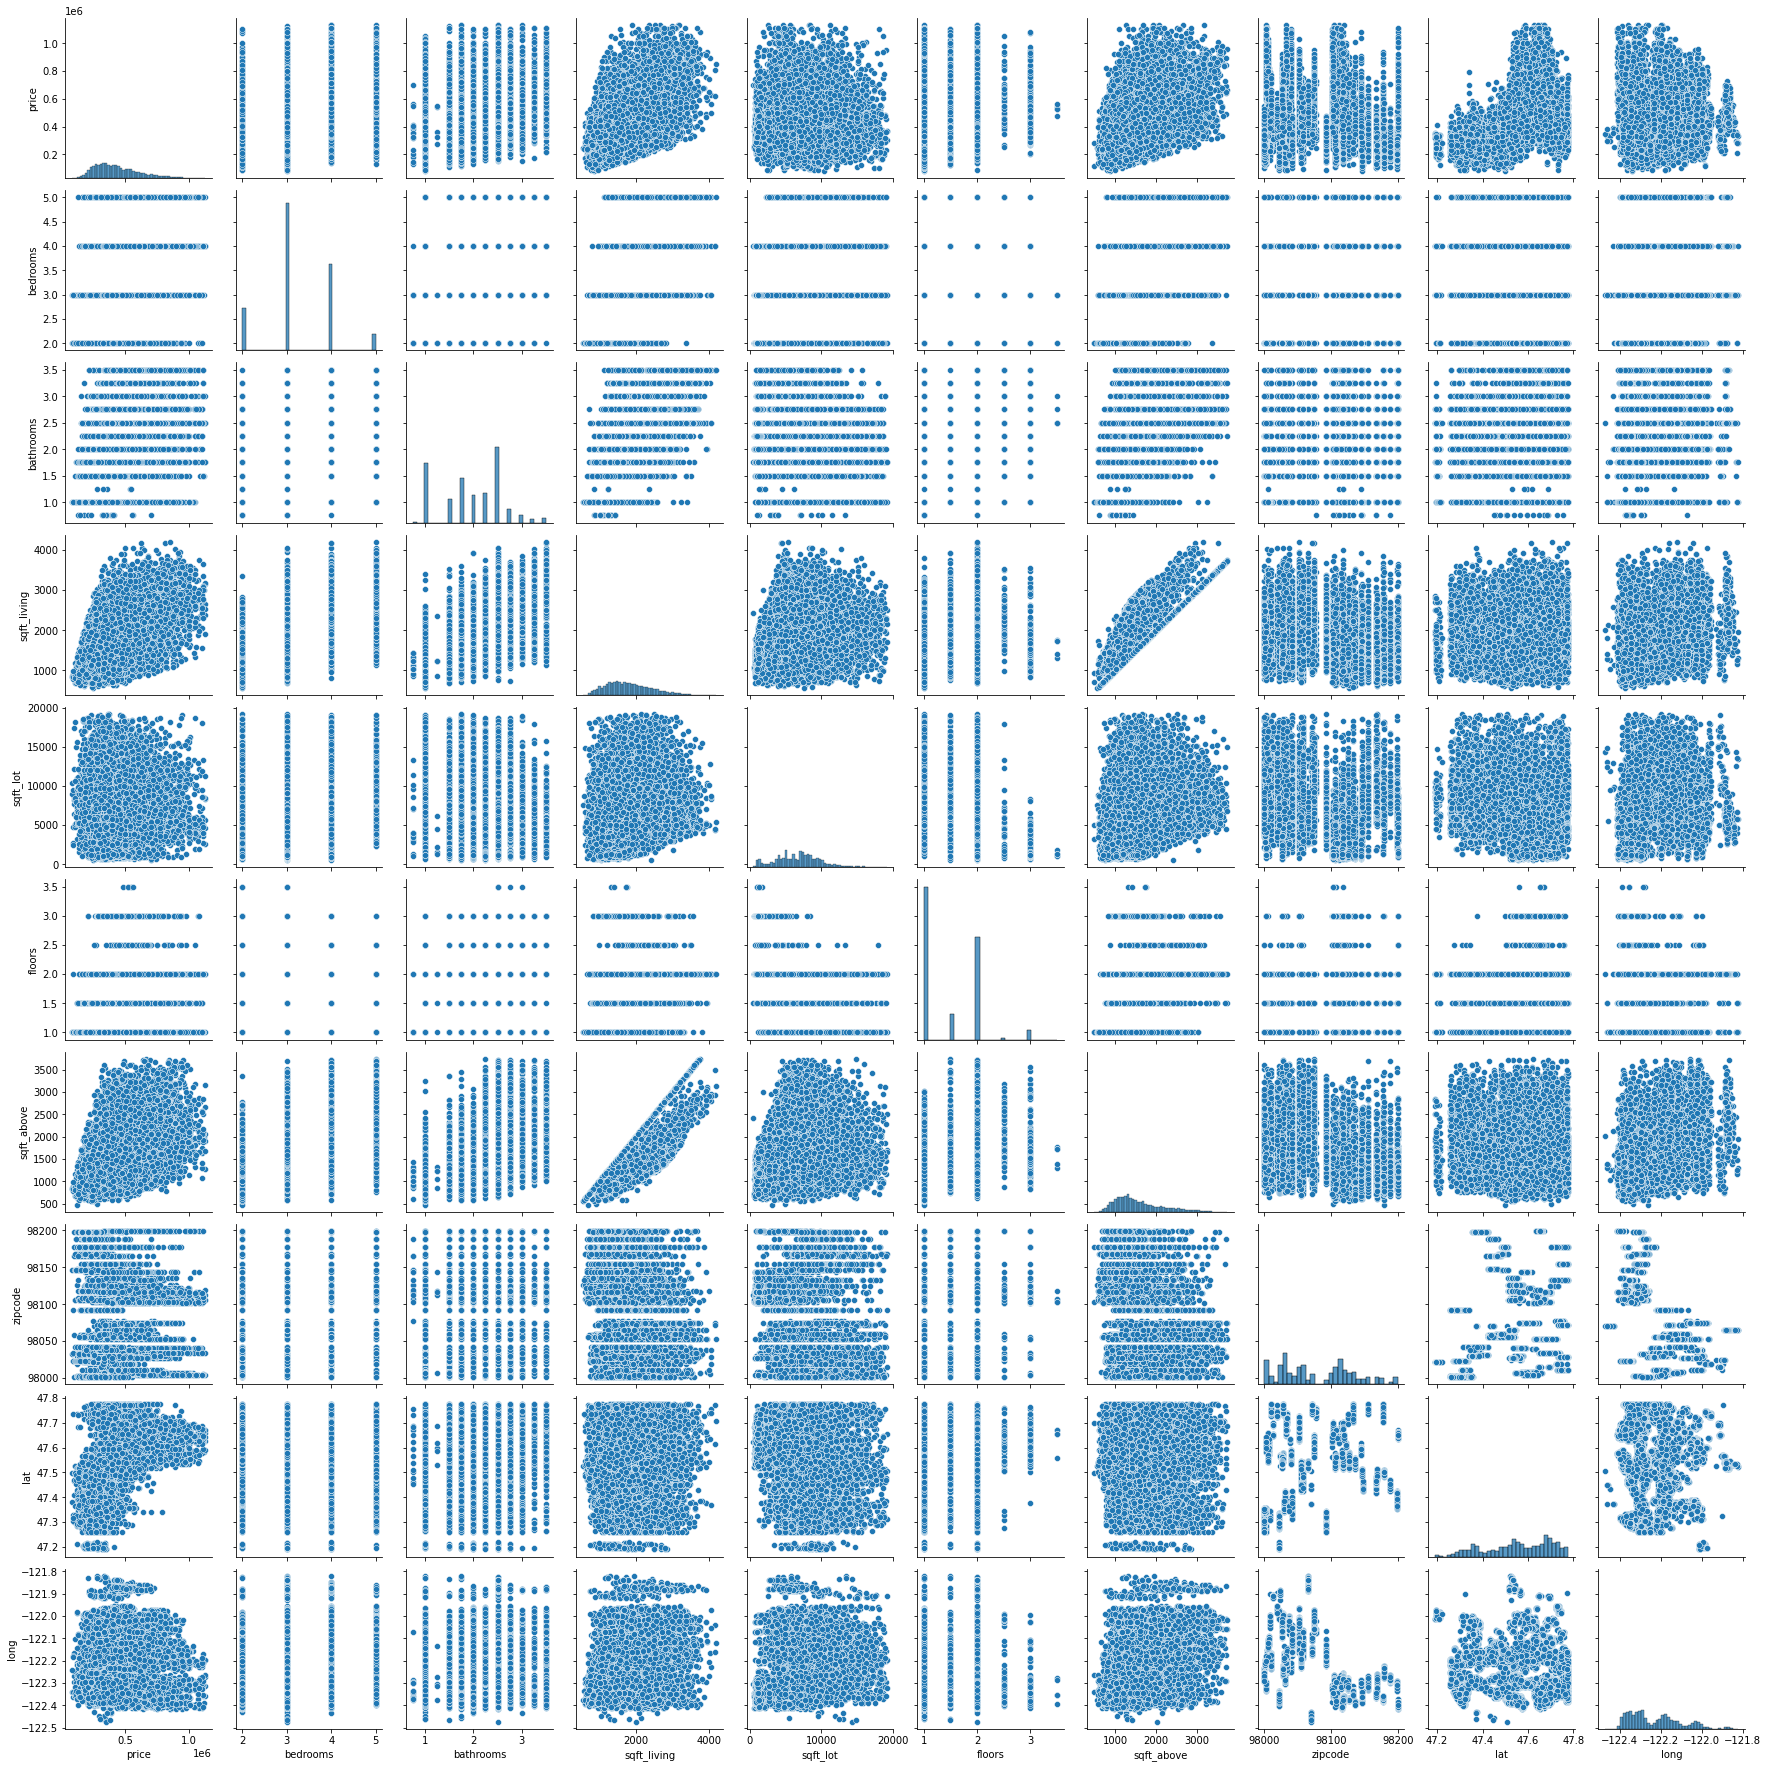

In [199]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df1)
plt.show()

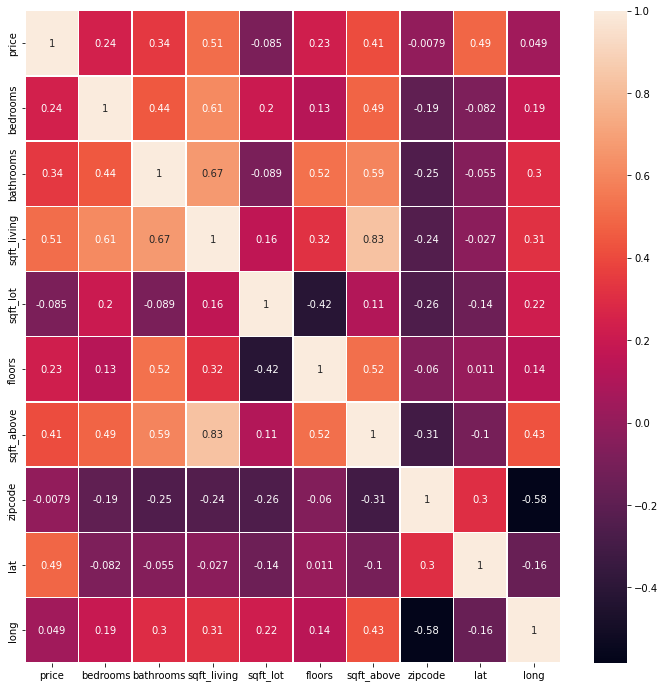

In [200]:
# A heatmap to show correlation

fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax)

In [201]:

# tabulating the correlation coefficients
corr = df1.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long
price,1.000000,0.240275,0.340515,0.514739,-0.085271,0.227673,0.408119,-0.007886,0.490442,0.048738
bedrooms,0.240275,1.000000,0.443847,0.614699,0.204914,0.129223,0.485951,-0.189524,-0.081965,0.191004
bathrooms,0.340515,0.443847,1.000000,0.669382,-0.088657,0.524506,0.592850,-0.250417,-0.055321,0.300852
sqft_living,0.514739,0.614699,0.669382,1.000000,0.164707,0.317602,0.831400,-0.239877,-0.027003,0.313769
sqft_lot,-0.085271,0.204914,-0.088657,0.164707,1.000000,-0.416314,0.114841,-0.257744,-0.142256,0.222400
floors,0.227673,0.129223,0.524506,0.317602,-0.416314,1.000000,0.518600,-0.059969,0.011043,0.141877
sqft_above,0.408119,0.485951,0.592850,0.831400,0.114841,0.518600,1.000000,-0.308143,-0.103626,0.426066
zipcode,-0.007886,-0.189524,-0.250417,-0.239877,-0.257744,-0.059969,-0.308143,1.000000,0.301972,-0.583422
lat,0.490442,-0.081965,-0.055321,-0.027003,-0.142256,0.011043,-0.103626,0.301972,1.000000,-0.161935
long,0.048738,0.191004,0.300852,0.313769,0.222400,0.141877,0.426066,-0.583422,-0.161935,1.000000


# **Implementing The Solution**

# **Regression Analysis**

**Multiple Linear Regression**

In [202]:
#separating independent and dependent variable
X = df1.iloc[:,1:].values
y = df1.iloc[:,0].values

In [203]:
##splitting dataset into training and testing dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [204]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

14981578953.39602


In [205]:
#Finding the regressor intercept
regressor.intercept_

-12686965.477791108

In [206]:
#Finding the regression coefficient
regressor.coef_

array([-1.28790781e+04,  1.08168715e+02,  1.53761697e+02, -5.92136603e+00,
       -3.22276319e+03,  2.29119411e+01, -3.43665272e+02,  6.43003479e+05,
       -1.31100662e+05])

In [207]:
for i in range(4):
    print(regressor.coef_[i])

-12879.078106461948
108.16871487607563
153.76169695791597
-5.921366027893782


In [208]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(x_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,2.987000e+03,2987.000000
mean,4.358412e+05,436469.097376
std,1.795082e+05,130342.310542
min,8.900000e+04,51505.048412
25%,2.999500e+05,343553.711355
50%,4.000000e+05,439425.204339
75%,5.441500e+05,518674.983086
max,1.130000e+06,856123.178678


In [209]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 90887.93702153741
Mean Squared Error: 14812526696.85052
Root Mean Squared Error: 121706.72412340462


In [210]:
# root mean squared error for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(x_train)))
rmse

122571.78312128937

In [211]:
#Finding the regressor score
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print('The regressor score is:',regr.score(x_test, y_test))

The regressor score is: 0.540160583003898


In [212]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,x_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

121464.51871973032

In [213]:
# residual plots and heteroskedasticity testing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df1.values
y = df1['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-1.4184098154466049e-11

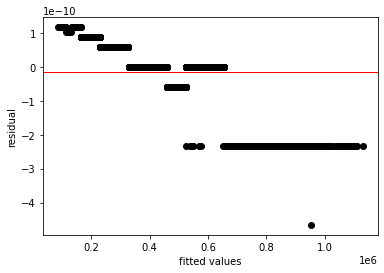

In [214]:
# residual plot
import matplotlib.pyplot as plt

plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [215]:
# Testing Heteroscedacity using the Bartletts Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred.flatten(), residuals.flatten())

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Heteroscedacity using the Bartlett's Test the Variance are Homogeneous

This means the the difference between the predicted values with the actual values is steady throughout our data

**Advantages of the model**

 Ability to identify outliers, or anomalies


**Limitation of the model**

Any disadvantage of using a multiple regression model usually comes down to the data being used. Two examples of this are using incomplete data and falsely concluding that a correlation is a causation

# **Quantile Regression**

In [216]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [217]:
# recalling the base model
print(first_model)

14981578953.39602


In [218]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df1)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.02035
Model:                       QuantReg   Bandwidth:                   3.577e+04
Method:                 Least Squares   Sparsity:                    4.604e+05
Date:                Sun, 13 Feb 2022   No. Observations:                14935
Time:                        15:04:17   Df Residuals:                    14933
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.55e+05   8170.733     31.209      0.000    2.39e+05    2.71e+05
bedrooms     4.75e+04   2437.099     19.490      0.000    4.27e+04    5.23e+04


our intercept is 2.55e+05 and our slope or the coefficient for our x is  4.75e+04. 
These are the parameters for the 0.5th quantile of our y. 

**Advantages of the model**

It is quite beneficial when heteroscedasticity is present in the data.
It is more useful than linear regression when the data is skewed.

**Limitations of the model**

It is to be kept in mind that the coefficients which we get in quantile regression for a particular quantile should differ significantly from those we obtain from linear regression.

## **Ridge Regression**

In [219]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [220]:
#Separating dependent and independent variables
X = df1.iloc[:,1:-1].values
y = df1.iloc[:,-1] .values

In [221]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

0.008789831978670717


The output  value of 0.008789831978670717 will be our indicator to determine if the regularized ridge regression model is superior or not.

In [222]:
#Finding best value for alpha using ridge regression
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [223]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 


# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 

0.008831777385155006

In [224]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 1e-05}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 1e-05. 
# The best_score_ tells us what the best possible mean squared error is.

0.008831777385155006

In [225]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=1e-05)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.00878983198196178


In [226]:
# The 0.00878983198196178 is lower than the 0.008831777385155006. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df1.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': -4.165688117556583e-05,
 'bedrooms': 0.026018975212754522,
 'floors': 8.758209024791429e-05,
 'price': -0.006783186727680645,
 'sqft_above': -0.0010865799378078343,
 'sqft_living': 3.005249222195333e-06,
 'sqft_lot': -0.016631287171729237,
 'zipcode': 0.03040820544062044}

**Advantage of the model**

It can do feature selection.

**Limitations of the model**

The model selected by lasso is not stable

# **Lasso Regression**

In [227]:
#importing our libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [228]:

# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [229]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.3895628966997918
lasso MSE: 0.009338248904456087
lasso coef: [-0.00000000e+00  0.00000000e+00 -1.21540633e-05  4.03613379e-06
  0.00000000e+00  7.30020746e-05 -7.14909201e-04 -0.00000000e+00]


In [230]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.420779719154991
linear score: 0.4284037937602303
lasso MSE: 0.008886199278729726
linear MSE: 0.008769233335894954
lasso best estimator coef: [-0.00000000e+00  0.00000000e+00 -2.27362989e-05  2.96771510e-06
 -0.00000000e+00  7.49195473e-05 -1.07401677e-03  0.00000000e+00]
linear coef: [-7.69881628e-03  2.54021533e-02 -3.99816424e-05  3.08613343e-06
 -1.63653116e-02  8.64255935e-05 -1.09779068e-03  3.64756228e-02]


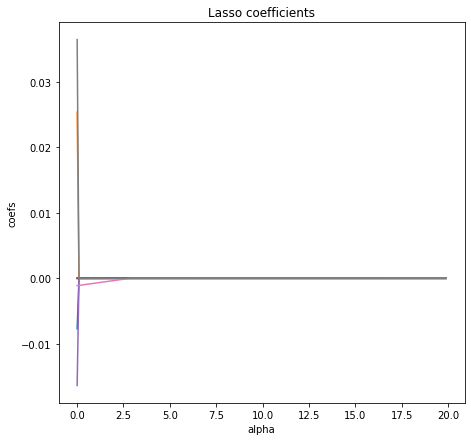

In [231]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

**Advantage of the model**

It produces simpler and more interpretable models that incorporate only a reduced set of the predictors

**Limitation of the model**

 If there are two or more highly collinear variables then Lasso Regression will select one of them randomly which is not a good technique in data interpretation.


# **ELASTIC NET REGRESSION**

In [232]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

0.008789831978670717


This mean standard error score of 0.009 is our benchmark for determining 
if the elastic net model will be better or worst.





In [233]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df1.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -4.165688117556583e-05,
 'bedrooms': 0.026018975212754522,
 'floors': 8.758209024791429e-05,
 'price': -0.006783186727680645,
 'sqft_above': -0.0010865799378078343,
 'sqft_living': 3.005249222195333e-06,
 'sqft_lot': -0.016631287171729237,
 'zipcode': 0.03040820544062044}

In [234]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [235]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.008895833416696074

In [236]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

0.015297643039668919


In [237]:
from sklearn.linear_model import ElasticNet
X = df1.iloc[:,1:-1].values
y = df1.iloc[:,-1] .values
regr = ElasticNet(random_state=0)
regr.fit(X, y)
third_model = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(third_model)

0.009033355731789807


In [238]:
print(regr.coef_)

[-0.00000000e+00  0.00000000e+00 -1.84386564e-05  3.43011305e-06
 -0.00000000e+00  7.47493065e-05 -9.10672254e-04  0.00000000e+00]


In [239]:
print(regr.intercept_)

-33.02065980642426


In [240]:
print(regr.predict([[0,1,2,3,4,5,6,7]]))

[-33.02577668]


**Advantage of the model**

Elastic Net reduces the impact of different features while not eliminating all of the features

**Limitation of the model**

computational cost

# **Conclusion**

Multiple linear regression model is the best model to be used as it was used as the base model.

# **Challenging the solution**

Improving the Multiple Linear regeression model by adding more terms to the model.

Parameter tuning to find the optimum value for each parameter to improve the accuracy of the model

**Follow up questions**

**1. Did we have the right data?**

Yes. The dataset that was provided was convenient for the analysis and suited the research question.

**2.Did we have the right question?**

Yes,the question provided was relevant to the given dataset.

**3.Do we need another data to answer the question?**

No. The dataset provided was able to answer the research question.